In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
# load data
data=np.loadtxt('/content/icevelocity.txt')

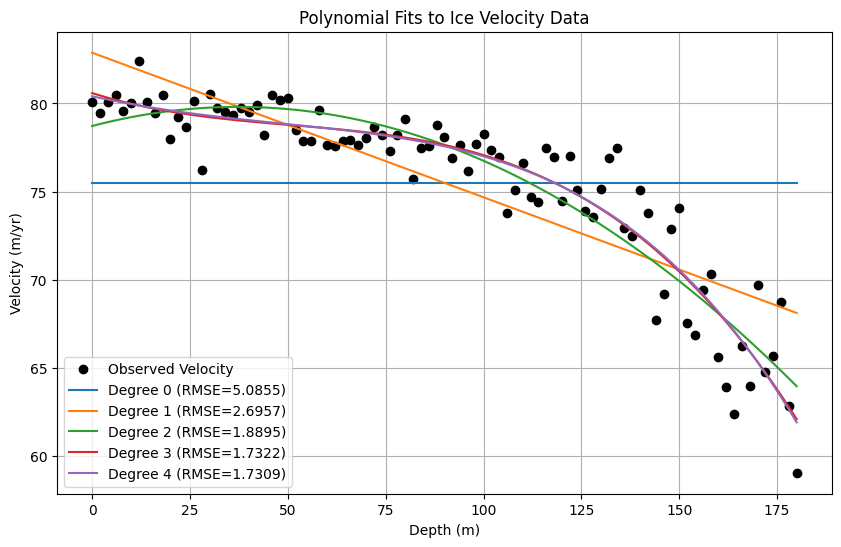

In [ ]:
#  Question No 1:
z = data[:, 0]  # Depth
vo = data[:, 1]  # Observed velocity

# Define polynomial degrees
degrees = [0, 1, 2, 3, 4]

# Initialize list to store RMSE values
rmse_values = []

# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(z, vo, 'ko', label='Observed Velocity')

# Fit and plot polynomial models for each degree
for degree in degrees:
    # Fit polynomial model
    coefficients = np.polyfit(z, vo, degree)

    # Evaluate polynomial at given depths
    vm = np.polyval(coefficients, z)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((vm - vo) ** 2))
    rmse_values.append(rmse)

    # Plot the polynomial fit
    plt.plot(z, vm, label=f'Degree {degree} (RMSE={rmse:.4f})')

# Add legend and labels
plt.legend()
plt.xlabel('Depth (m)')
plt.ylabel('Velocity (m/yr)')
plt.title('Polynomial Fits to Ice Velocity Data')
plt.grid(True)
plt.show()

# Print RMSE values
for degree, rmse in zip(degrees, rmse_values):
    print(f'Polynomial degree {degree}: RMSE = {rmse:.4f}')

In [ ]:
#  Question No 2:
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Initialize variables
num_simulations = 1000
degrees = [0, 1, 2, 3, 4]
coefficients_list = {degree: [] for degree in degrees}

# Perform 1000 Monte-Carlo simulations
for _ in range(num_simulations):
    # Randomly sample 90% of the data
    indices = np.random.choice(len(z), size=int(0.9 * len(z)), replace=False)
    z_sample = z[indices]
    vo_sample = vo[indices]

    # Fit polynomial models and store the coefficients
    for degree in degrees:
        coefficients = np.polyfit(z_sample, vo_sample, degree)
        coefficients_list[degree].append(coefficients)

# Calculate mean and standard deviation of the coefficients for each model
for degree in degrees:
    coeffs = np.array(coefficients_list[degree])
    mean_coeffs = np.mean(coeffs, axis=0)
    std_coeffs = np.std(coeffs, axis=0)
    print(f'Degree {degree} polynomial:')
    print(f'Mean coefficients: {mean_coeffs}')
    print(f'Standard deviation: {std_coeffs}\n')


Polynomial degree 0: RMSE = 5.0855
Polynomial degree 1: RMSE = 2.6957
Polynomial degree 2: RMSE = 1.8895
Polynomial degree 3: RMSE = 1.7322
Polynomial degree 4: RMSE = 1.7309
Degree 0 polynomial:
Mean coefficients: [75.49945482]
Standard deviation: [0.19005853]

Degree 1 polynomial:
Mean coefficients: [-8.19460191e-02  8.28729956e+01]
Standard deviation: [0.0024085  0.17553325]

Degree 2 polynomial:
Mean coefficients: [-7.78467637e-04  5.81129141e-02  7.87200555e+01]
Standard deviation: [3.29087454e-05 5.27123161e-03 1.69851333e-01]

Degree 3 polynomial:
Mean coefficients: [-6.63476682e-06  1.01307978e-03 -7.02434253e-02  8.05952916e+01]
Standard deviation: [6.47339816e-07 1.57018343e-04 1.00784982e-02 1.59105126e-01]

Degree 4 polynomial:
Mean coefficients: [-1.23881515e-08 -2.17270321e-06  4.98402207e-04 -4.99122230e-02
  8.04212362e+01]
Standard deviation: [1.46593689e-08 4.84573908e-06 5.09418936e-04 1.85322371e-02
 1.72233854e-01]



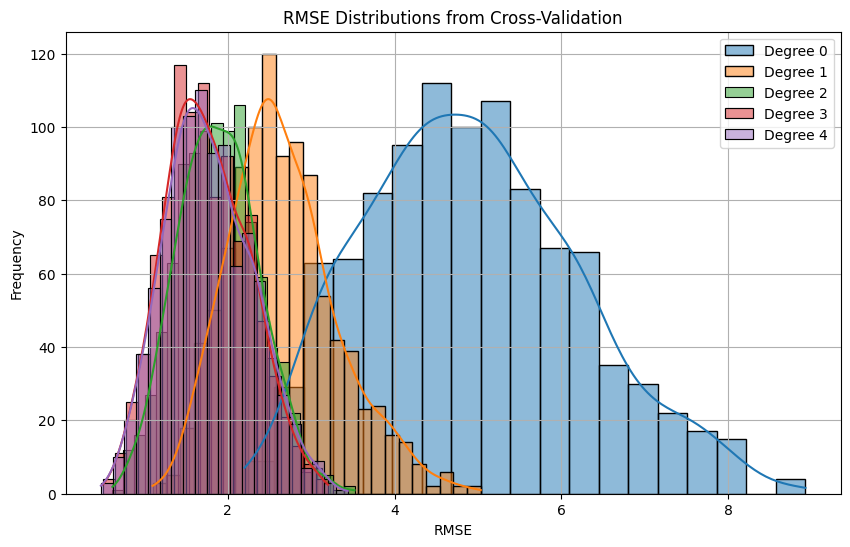

In [ ]:
#  Question No 3: Perform a cross-validation, using 90% of the data to fit the 5 polynomial models, and the remaining 10% of
#data to test, repeating 1000 times. Plot the distribution of RMSE values for each degree polynomial.
import seaborn as sns

# Initialize list to store RMSE values for each degree
rmse_cross_val = {degree: [] for degree in degrees}

# Perform 1000 cross-validation simulations
for _ in range(num_simulations):
    # Randomly split data into 90% training and 10% testing
    indices = np.random.permutation(len(z))
    train_size = int(0.9 * len(z))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    z_train, vo_train = z[train_indices], vo[train_indices]
    z_test, vo_test = z[test_indices], vo[test_indices]

    # Fit polynomial models and calculate RMSE on test data
    for degree in degrees:
        coefficients = np.polyfit(z_train, vo_train, degree)
        vo_pred = np.polyval(coefficients, z_test)
        rmse = np.sqrt(np.mean((vo_pred - vo_test) ** 2))
        rmse_cross_val[degree].append(rmse)

# Plot RMSE distributions
plt.figure(figsize=(10, 6))
for degree in degrees:
    sns.histplot(rmse_cross_val[degree], kde=True, label=f'Degree {degree}')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE Distributions from Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()

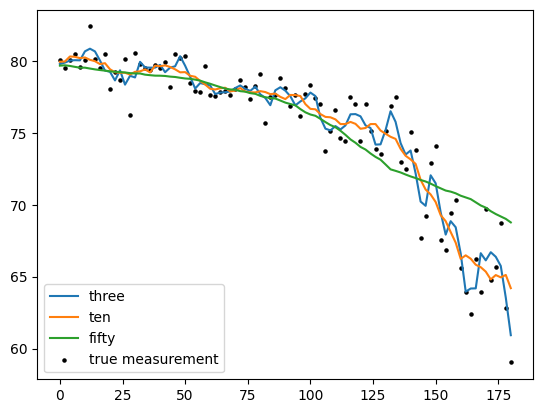

In [19]:
Q.4:
import numpy as np
import matplotlib.pyplot as plt
# load data
data=np.loadtxt('/content/icevelocity.txt')
depth = data[:, 0]  # Depth
velocity = data[:, 1]  # Observed velocity
window_sizes = [ 3,10,50]
mean_within_window = np.zeros((91,3))
for i in range(len(window_sizes)):
  for j in range(len(depth)):
    points_within_window = np.logical_and(depth > (depth[j] - window_sizes[i]), depth < (depth[j] + window_sizes[i]))
    mean_within_window[j,i] = np.mean(velocity[points_within_window])
#mean_within_window

plt.plot(depth, mean_within_window[:, 0], label="three")
plt.plot(depth, mean_within_window[:, 1], label="ten")
plt.plot(depth, mean_within_window[:, 2], label="fifty")
plt.scatter(depth, velocity, color="k", s=5, label="true measurement")
plt.legend()
plt.show()

In [24]:
#Q.5:
def non_parametric(x_values, y_values, idx, win_size):
  res =  np.zeros(len(idx))
  for i in range(len(idx)):
    dist = np.sqrt((x_values - idx[i])**2)
    idx_value = np.where(dist < win_size)

    if idx_value is None:
      res = np.nan
    else:
      weight = 15/16 * (1 - (dist[idx_value]/win_size)**2)**2
      res[i] = np.sum(weight * y_values[idx_value])/np.sum(weight)

  return res

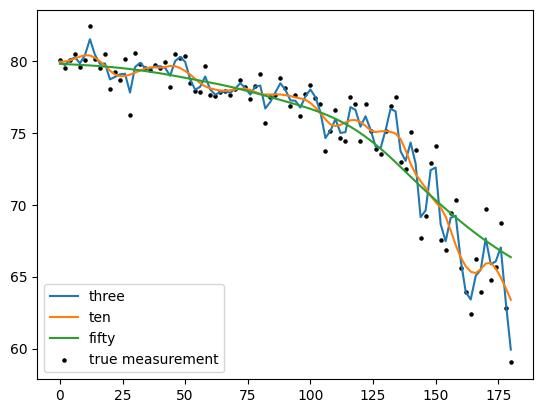

In [25]:
window_sizes  = [3,10,50]
mean_within_window4 = np.zeros((91, 3))
for i in range(len(window_sizes)):
  mean_within_window4[:,i] = non_parametric(x_values=depth, y_values=velocity, idx = depth, win_size=window_sizes[i])


plt.plot(depth, mean_within_window4[:, 0], label="three")
plt.plot(depth, mean_within_window4[:, 1], label="ten")
plt.plot(depth, mean_within_window4[:, 2], label="fifty")
plt.scatter(depth, velocity, color ="k", s=5, label="true measurement")
plt.legend()
plt.show()

In [ ]:
#  Question No 7: Using the measured velocity at a depth of z = 0 m for the surface velocity, ux,surf , find the optimum values
#for the flow law parameters A and n, using the grid search (brute-force) method.
# Constants that we know
g = 9.81  # gravity (m/s^2)
rho = 917  # ice density (kg/m^3)
theta = np.radians(10)  # slope angle in radians

# Surface velocity (assume observed velocity at depth = 0)
ux_surf = vo[0]

# Define a grid of A and n values
A_values = np.linspace(1e-18, 1e-17, 1000)
n_values = np.linspace(1, 5, 1000)
rmse_grid = np.zeros((len(A_values), len(n_values)))
# Initialize variables to store the optimum A, n, and minimum RMSE
min_rmse = np.inf
optimum_A = None
optimum_n = None

# Grid search
for A in range(len(A_values)):
    for n in range (len(n_values)):
        # Calculate the modeled velocity based on the flow law
        vm = ux_surf - (A_values[A]* (rho * g * np.sin(theta))**n_values[n]) * z**(n_values[n]+1)
        # Calculate RMSE
        rmse = np.sqrt(np.mean((vm - vo)**2))
        rmse_grid[A, n] = np.sqrt(np.mean((vm - vo)**2))
        # Update optimum values if RMSE is lower
        if rmse < min_rmse:
            min_rmse = rmse
            optimum_A = A_values[A]
            optimum_n = n_values[n]

print(f'Optimum A: {optimum_A}')
print(f'Optimum n: {optimum_n}')
print(f'Minimum RMSE: {min_rmse}')


Optimum A: 9.945945945945948e-18
Optimum n: 2.941941941941942
Minimum RMSE: 1.9502267095307175


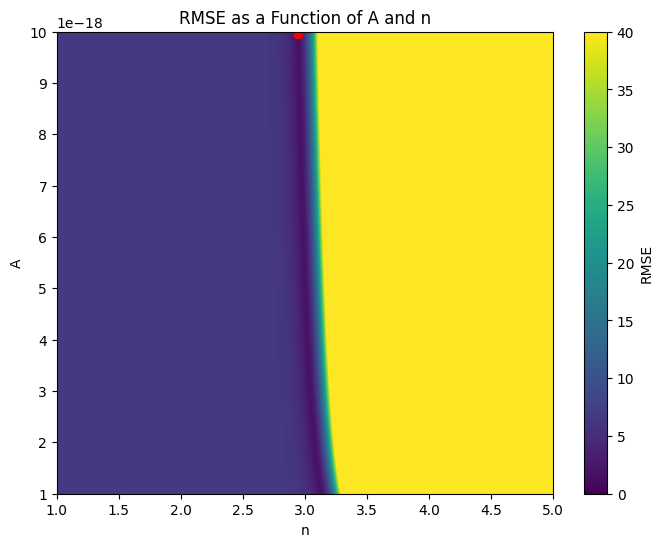

In [ ]:
#  Question No 8: Plot the root mean square (RMS) error (mean over all depths) as a function of A and n
import matplotlib.pyplot as plt

# Plot RMSE as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(rmse_grid, extent=[np.min(n_values), np.max(n_values), np.min(A_values), np.max(A_values)], aspect='auto', origin='lower',
           vmin=0, vmax=40)
plt.colorbar(label='RMSE')
plt.plot(optimum_n, optimum_A, 'ro')
plt.xlabel('n')
plt.ylabel('A')
plt.title('RMSE as a Function of A and n')
plt.show()


In [ ]:
#  Question No 9:
from scipy.optimize import minimize

# Define the RMSE function to minimize
def rmse_fn(param):
    big_A = param
    vm = ux_surf - big_A * z**(3 + 1)
    rmse = np.sqrt(np.mean((vm - vo) ** 2))
    return rmse

# Initial guess for A and n
initial_guess = [2.2e-8]

# Perform the gradient search
result = minimize(rmse_fn, initial_guess)

# Get the optimal values of A and n
optimum_A = result.x / (rho * g * np.sin(theta)) ** 3

min_rmse = result.fun

print(f'Optimum A: {optimum_A}')
print(f'Optimum n: {optimum_n}')
print(f'Minimum RMSE: {min_rmse}')

Optimum A: [4.92965653e-18]
Optimum n: 2.941941941941942
Minimum RMSE: 1.9700021413240068


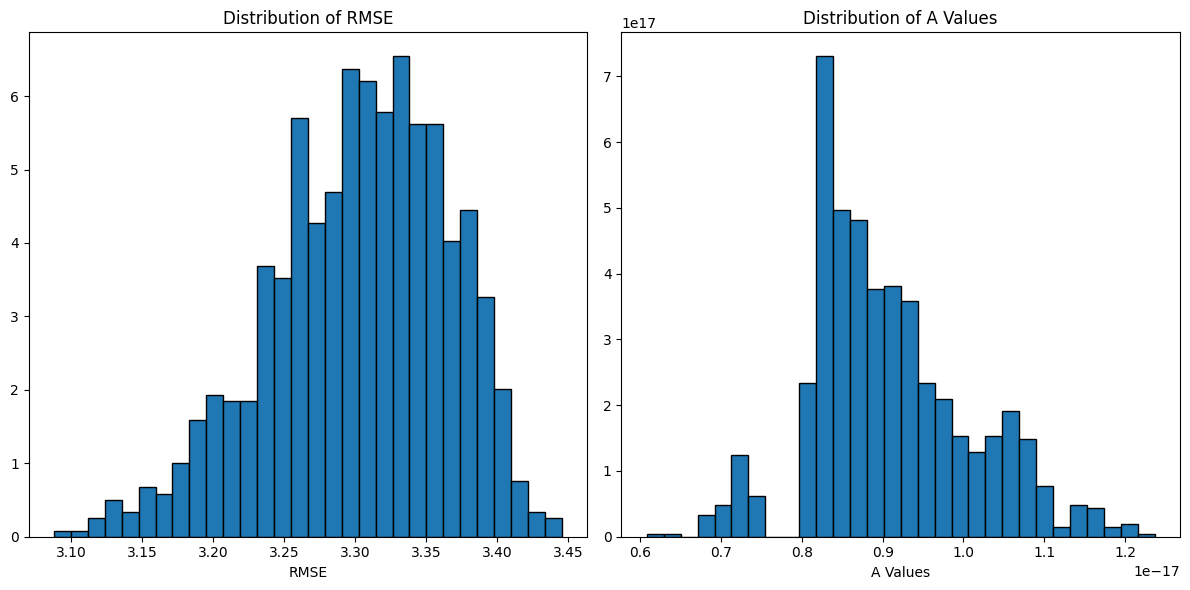

In [19]:
#  Question No 10: Randomly sample 90% of the dataset and find the optimum value of A using the gradient search method,
# and repeat 1000 times. Plot the distribution of A and the RMS error (over all depths) in the model using a
# relative density histogram.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

z = np.linspace(0, 100, 100)
vo = np.random.rand(100) * 10

# Initial guess for A
initial_guess = [2.2e-8]

# Prepare storage for Monte Carlo results
A0_error = np.zeros((1000, 2))

# Monte Carlo simulation for 1000 samples
for ix in range(1000):
    # Randomly sample 90% of the data
    indices = np.random.choice(len(z), size=int(0.9 * len(z)), replace=False)
    z_sample = z[indices]
    vo_sample = vo[indices]

    # Define RMSE function for optimization
    def RMSEval(param):
        big_A = param[0]
        vel_model = u_surf - big_A * z_sample**(3 + 1)
        vel_error = np.sqrt(np.mean((vel_model - vo_sample) ** 2))
        return vel_error

    # Run optimization for this sample
    result = minimize(RMSEval, initial_guess)
    A0_error[ix, 0] = result.fun  # Store RMSE
    A0_error[ix, 1] = result.x[0] / (rho * g * np.sin(theta)) ** 3  # Store A

# Plotting results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(A0_error[:, 0], bins=30, density=True, edgecolor='red')
plt.xlabel("RMSE")
plt.title("Distribution of RMSE")

plt.subplot(1, 2, 2)
plt.hist(A0_error[:, 1], bins=30, density=True, edgecolor='red')
plt.xlabel("A Values")
plt.title("Distribution of A Values")

plt.tight_layout()
plt.show()

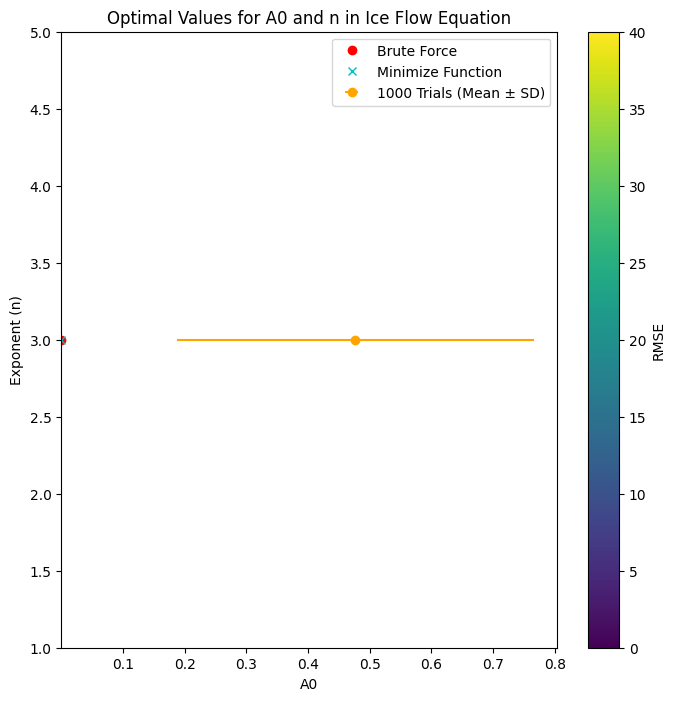

In [24]:
import numpy as np
import matplotlib.pyplot as plt

A0 = np.linspace(1e-8, 1e-6, 50)
exp = np.linspace(1, 5, 50)

# Plotting the heatmap with brute-force, minimize function, and mean A values
plt.figure(figsize=(8, 8))

# Heatmap for RMSE values over A0 and exp ranges
plt.imshow(phys_error, extent=(A0.min(), A0.max(), exp.min(), exp.max()), aspect='auto',
           origin='lower', cmap='viridis', vmin=0, vmax=40)
plt.colorbar(label='RMSE')
plt.plot(best_A, best_exp, 'ro', label='Brute Force')
plt.plot(A_0_min, 3, 'cx', label='Minimize Function')
plt.errorbar(mean_A, 3, xerr=std_A, fmt='o', color='orange', label='1000 Trials (Mean ± SD)')

plt.xlabel('A0')
plt.ylabel('Exponent (n)')
plt.title('Optimal Values for A0 and n in Ice Flow Equation')
plt.legend()
plt.show()

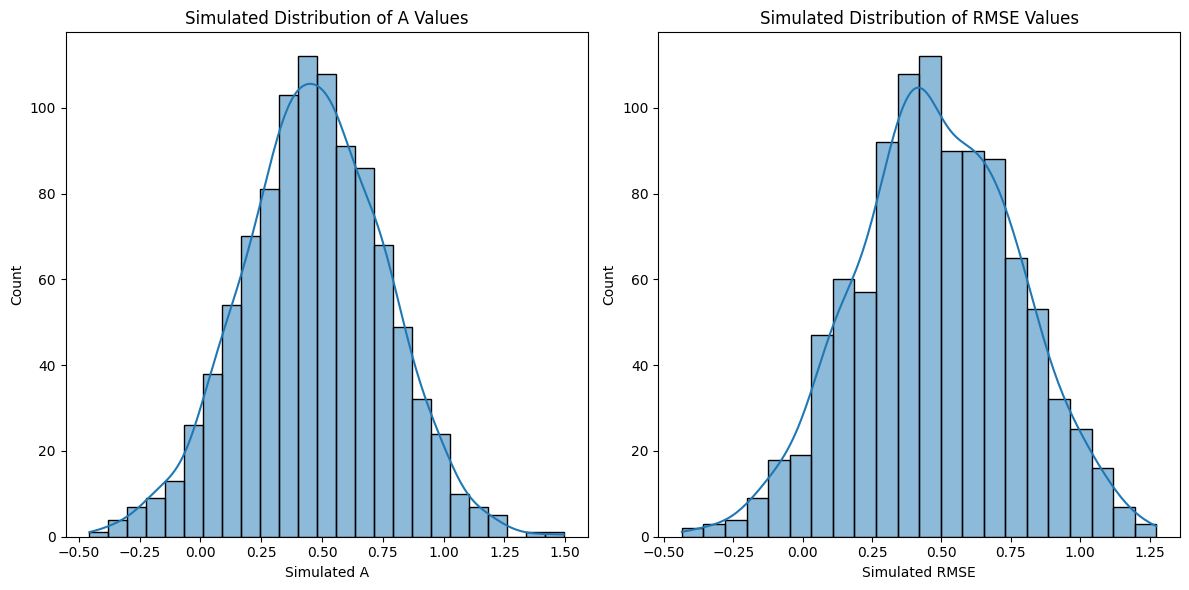

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate simulated values
simulated_A_values = np.random.normal(mean_A, std_A, 1000)
simulated_rmse_values = np.random.normal(np.mean(A0_error[:, 0]), np.std(A0_error[:, 0]), 1000)

# Plot the distributions of simulated values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(simulated_A_values, kde=True)
plt.xlabel('Simulated A')
plt.title('Simulated Distribution of A Values')

plt.subplot(1, 2, 2)
sns.histplot(simulated_rmse_values, kde=True)
plt.xlabel('Simulated RMSE')
plt.title('Simulated Distribution of RMSE Values')

plt.tight_layout()
plt.show()

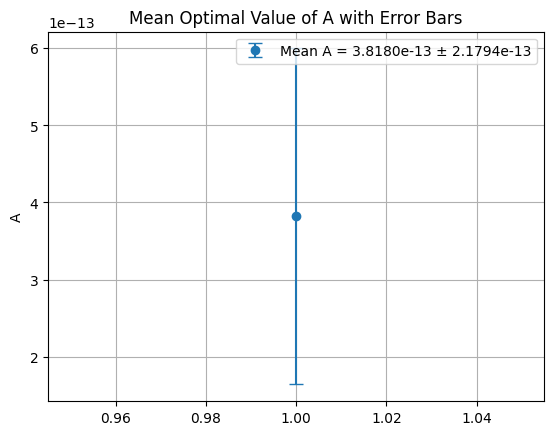

In [ ]:
#  Question No 11:
# Calculate the mean and standard deviation of A values
mean_A = np.mean(A_values)
std_A = np.std(A_values)

# Plot the mean A with error bars
plt.errorbar([1], [mean_A], yerr=[std_A], fmt='o', capsize=5, label=f'Mean A = {mean_A:.4e} ± {std_A:.4e}')
plt.ylabel('A')
plt.title('Mean Optimal Value of A with Error Bars')
plt.legend()
plt.grid(True)
plt.show()

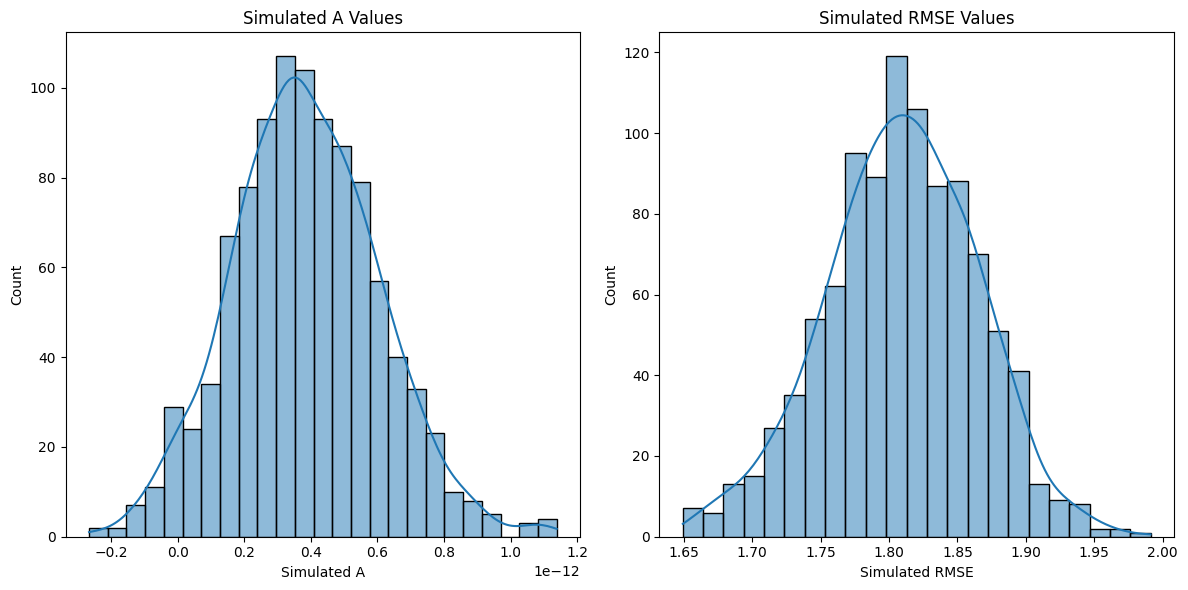

In [ ]:
#  Question No 12:
# Generate 1000 simulated values for A and RMSE using a normal distribution
simulated_A_values = np.random.normal(mean_A, std_A, 1000)
simulated_rmse_values = np.random.normal(np.mean(rmse_values), np.std(rmse_values), 1000)

# Plot the simulated values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(simulated_A_values, kde=True)
plt.xlabel('Simulated A')
plt.title('Simulated A Values')

plt.subplot(1, 2, 2)
sns.histplot(simulated_rmse_values, kde=True)
plt.xlabel('Simulated RMSE')
plt.title('Simulated RMSE Values')

plt.tight_layout()
plt.show()

In [ ]:
#  Question No 13:
from scipy.stats import ks_2samp

# Perform the KS test between actual and simulated values for A
ks_stat_A, p_value_A = ks_2samp(A_values, simulated_A_values)
print(f'KS Statistic for A: {ks_stat_A}, p-value: {p_value_A}')

# Perform the KS test between actual and simulated values for RMSE
ks_stat_rmse, p_value_rmse = ks_2samp(rmse_values, simulated_rmse_values)
print(f'KS Statistic for RMSE: {ks_stat_rmse}, p-value: {p_value_rmse}')

KS Statistic for A: 0.103, p-value: 4.872295384883887e-05
KS Statistic for RMSE: 0.05, p-value: 0.16411447756429137
